In [ ]:
import pandas as pd
data=pd.read_csv("drive/My Drive/DataSets/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are no null values, but there are zero values in Glucose, BP, Skin Thickness, Insulin, BMI. Treating zeroes as null values.

In [ ]:
import numpy as np

In [ ]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data['Glucose'].fillna(data['Glucose'].median(),inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].median(),inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(),inplace=True)
data['Insulin'].fillna(data['Insulin'].median(),inplace=True)
data['BMI'].fillna(data['BMI'].median(),inplace=True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


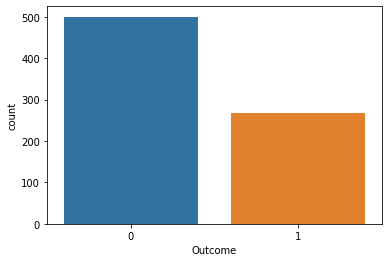

In [ ]:
import seaborn as sns
sns.countplot('Outcome',data=data)

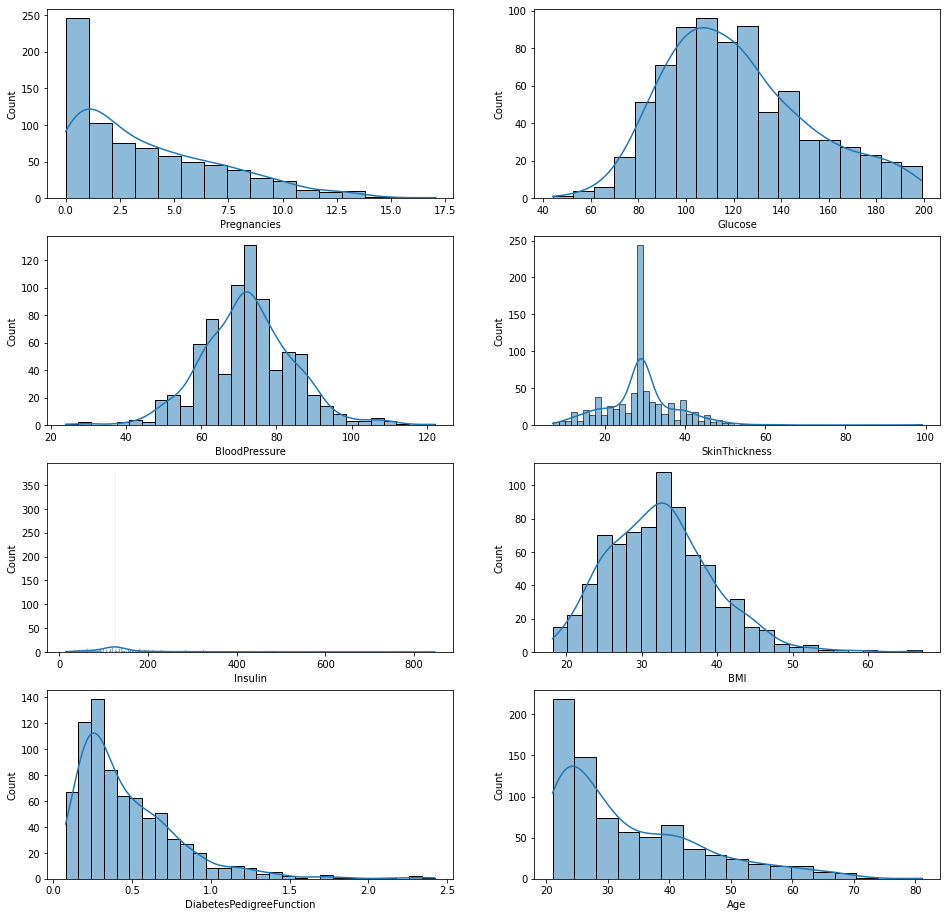

In [ ]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(4, 2, figsize=(16, 16))
sns.histplot(data['Pregnancies'],ax=axis[0][0],kde=True)
sns.histplot(data['Glucose'],ax=axis[0][1],kde=True)
sns.histplot(data['BloodPressure'],ax=axis[1][0],kde=True)
sns.histplot(data['SkinThickness'],ax=axis[1][1],kde=True)
sns.histplot(data['Insulin'],ax=axis[2][0],kde=True)
sns.histplot(data['BMI'],ax=axis[2][1],kde=True)
sns.histplot(data['DiabetesPedigreeFunction'],ax=axis[3][0],kde=True)
sns.histplot(data['Age'],ax=axis[3][1],kde=True)

Glucose, Skin Thickness, Blood Pressure, BMI - normally distributed
Pregnancies, Insulin, Age, DiabetesPedigreeFunction - rightly skewed.

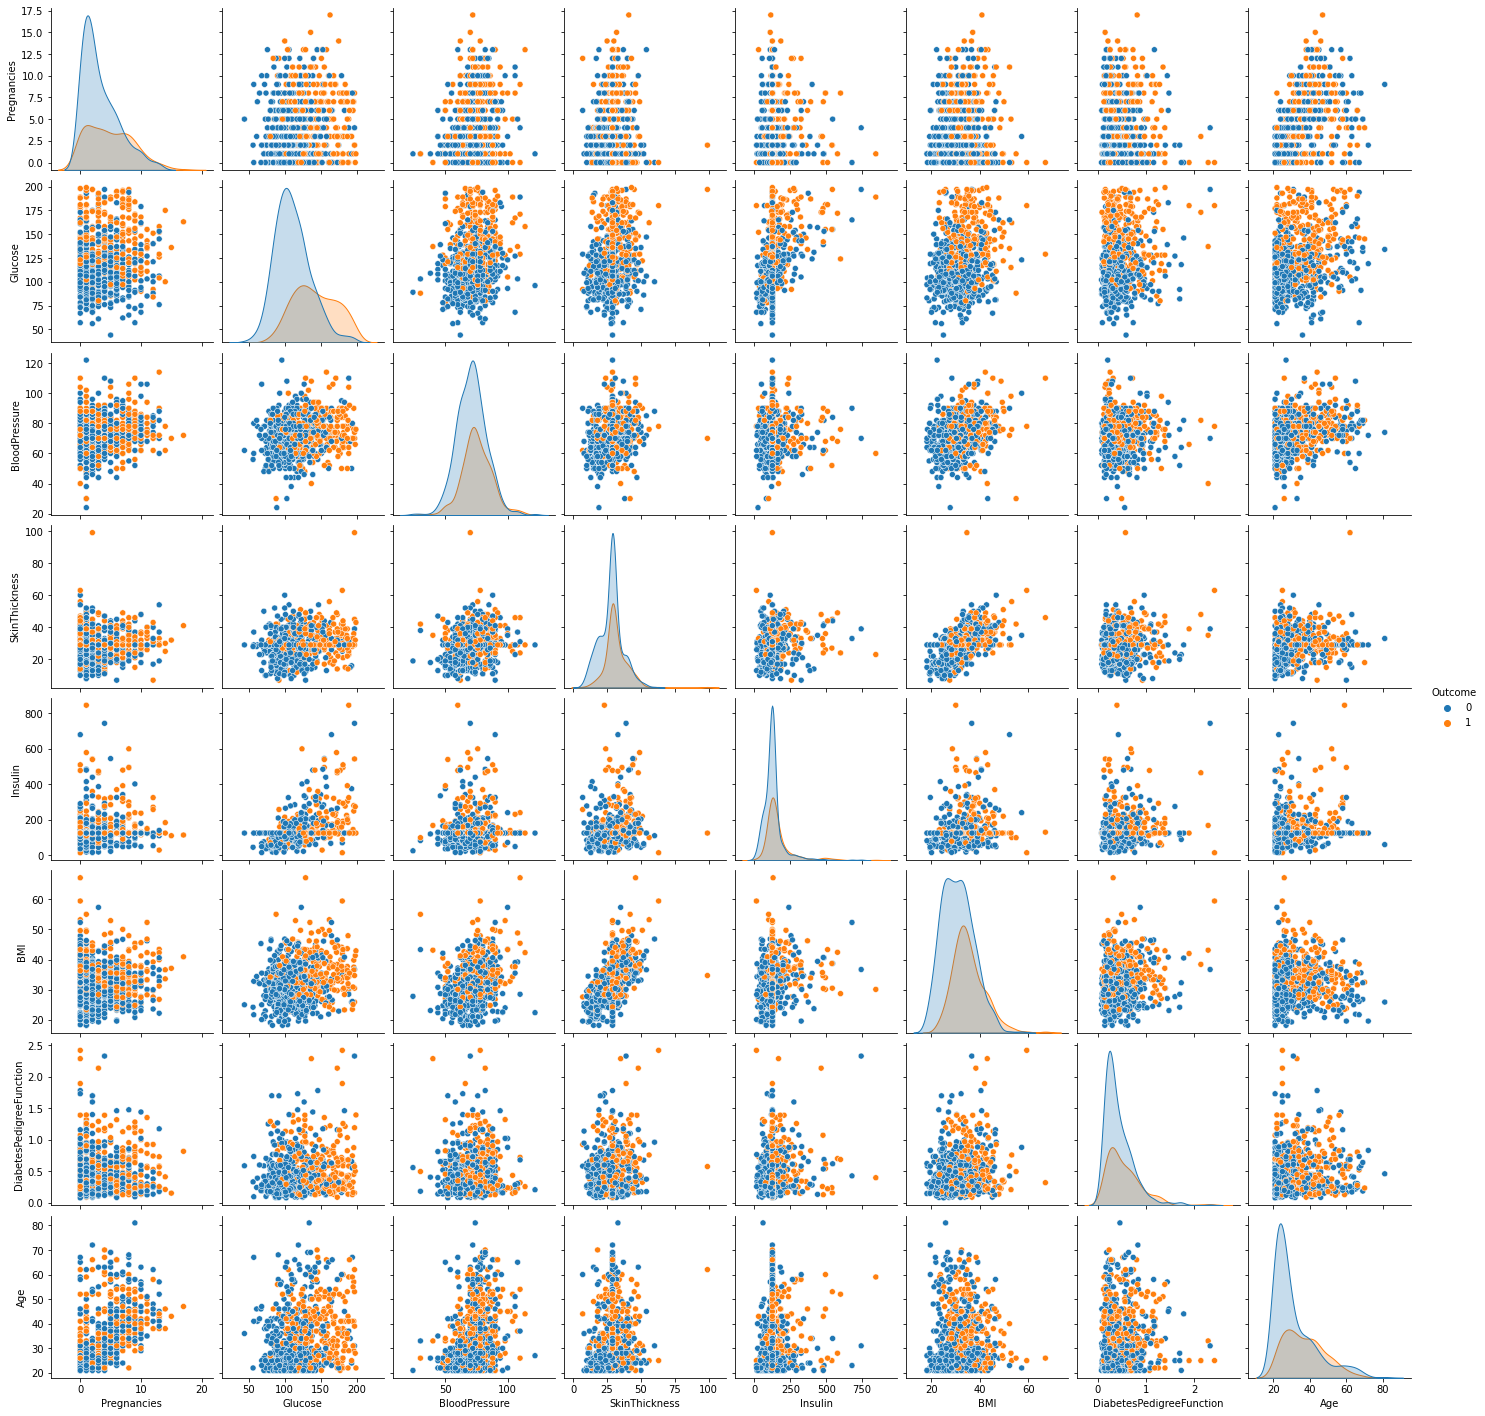

In [ ]:
sns.pairplot(data,hue='Outcome')

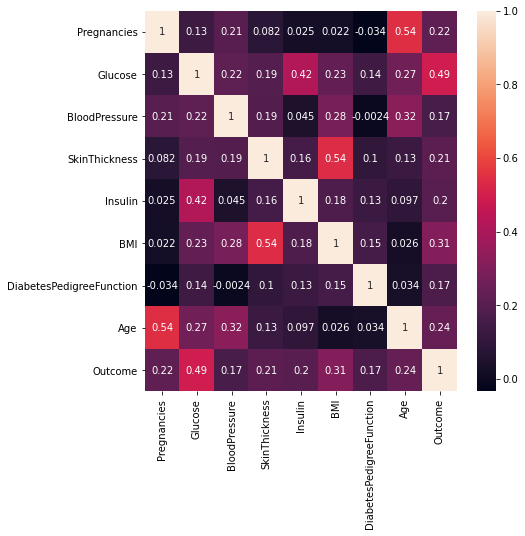

In [ ]:
cor=data.corr()
plt.figure(figsize=(7,7))
ax=sns.heatmap(cor,annot=True)

Most correlated parameters with Outcome - Glucose,Age,BMI and Pregnancies

Insulin and DiabetesPedigreeFunction have little correlation with the outcome.

BloodPressure and SkinThickness have tiny correlation with the outcome.

There is a little correlation between Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose

In [ ]:
pd.crosstab(data['Pregnancies'],data['Outcome'])

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


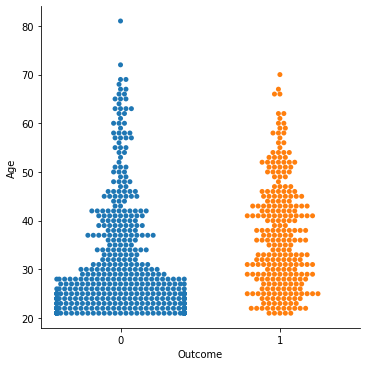

In [ ]:
sns.catplot('Outcome','Age',data=data,kind="swarm")

In [ ]:
a=pd.Series([])
for i in data.index:
    if(data.loc[i:i,]['Age']<=24).bool():
        a=a.append(pd.Series(['21-24']))
    elif(data.loc[i:i,]['Age']<=30).bool():
        a=a.append(pd.Series(['25-30']))
    elif(data.loc[i:i,]['Age']<=40).bool():
        a=a.append(pd.Series(['31-40']))
    elif(data.loc[i:i,]['Age']<=55).bool():
        a=a.append(pd.Series(['41-55']))
    else:
        a=a.append(pd.Series(['>55']))
a.reset_index(drop=True,inplace=True)
data['AgeBins']=a
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeBins
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,41-55
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,31-40
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,31-40
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,21-24
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,31-40


In [ ]:
data1=data[data['Outcome']==1].groupby('AgeBins')[['Outcome']].count()
data1.head()

,Outcome
AgeBins,
21-24,31
25-30,59
31-40,76
41-55,85
>55,17


In [ ]:
data2=data.groupby('AgeBins')[['Outcome']].count()
data1['Diabetic %']=(data1['Outcome']/data2['Outcome'])*100
data1

,Outcome,Diabetic %
AgeBins,,
21-24,31,14.155251
25-30,59,29.797980
31-40,76,48.407643
41-55,85,59.027778
>55,17,34.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


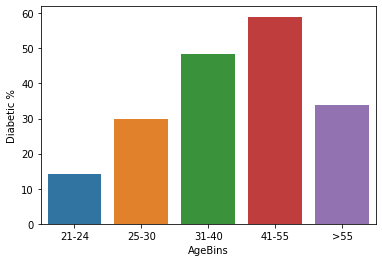

In [ ]:
sns.barplot(data1.index,data1['Diabetic %'])

Pregnancies vs. Outcome

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


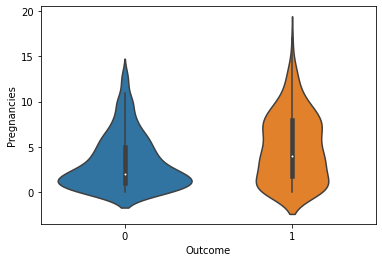

In [ ]:
sns.violinplot('Outcome','Pregnancies',data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


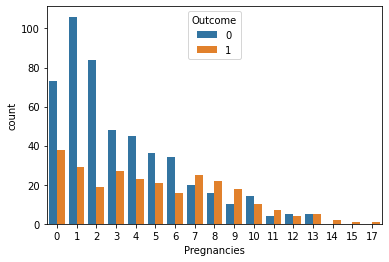

In [ ]:
sns.countplot('Pregnancies',hue="Outcome",data=data)

Glucose vs. Outcome

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


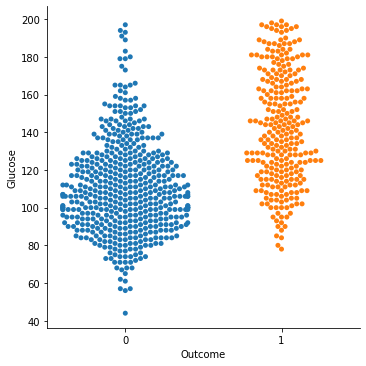

In [ ]:
sns.catplot('Outcome','Glucose',data=data,kind='swarm')

Bp vs. Outcome

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


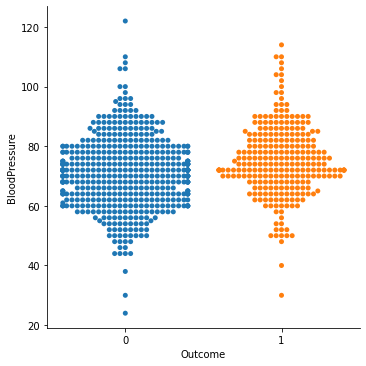

In [ ]:
sns.catplot('Outcome','BloodPressure',data=data,kind='swarm')

SkinThickness vs. Outcome

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


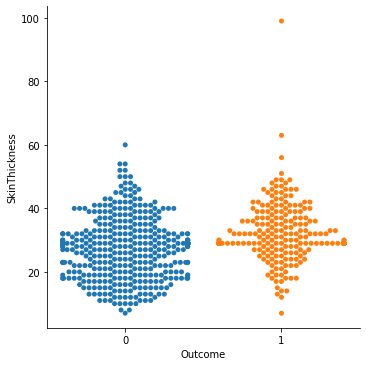

In [ ]:
sns.catplot('Outcome','SkinThickness',data=data,kind='swarm')

Insulin vs.Outcome

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


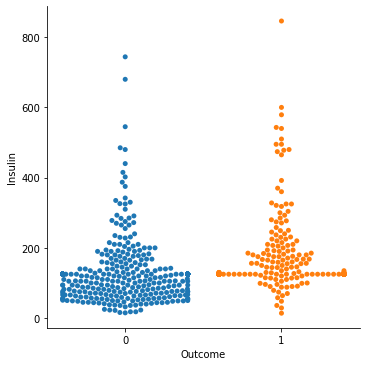

In [ ]:
sns.catplot('Outcome','Insulin',data=data,kind='swarm')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


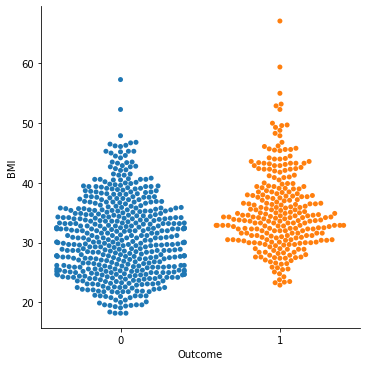

In [ ]:
sns.catplot('Outcome','BMI',data=data,kind='swarm')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


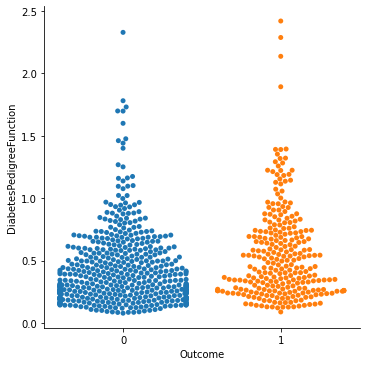

In [ ]:
sns.catplot('Outcome','DiabetesPedigreeFunction',data=data,kind='swarm')

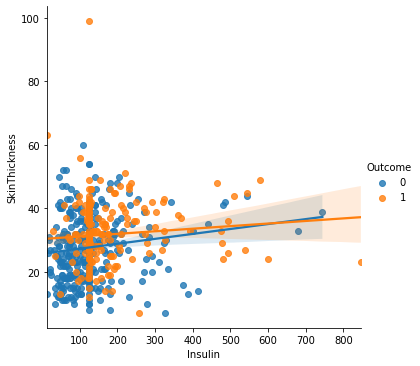

In [ ]:
sns.lmplot(x='Insulin',y='SkinThickness',data=data,hue='Outcome')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


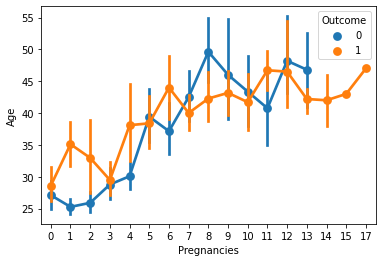

In [ ]:
sns.pointplot(data['Pregnancies'], data['Age'], hue=data['Outcome'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


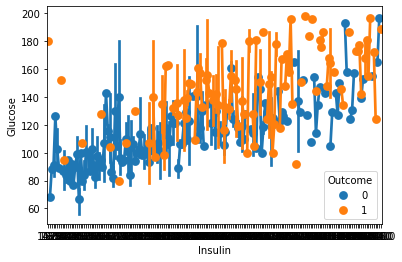

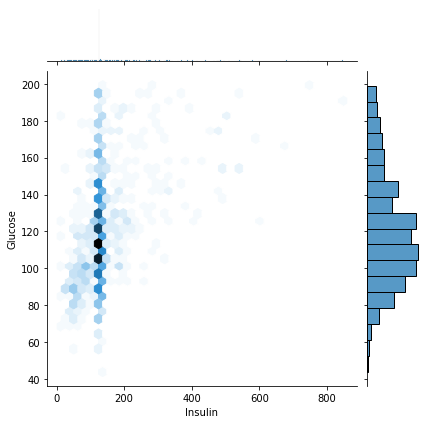

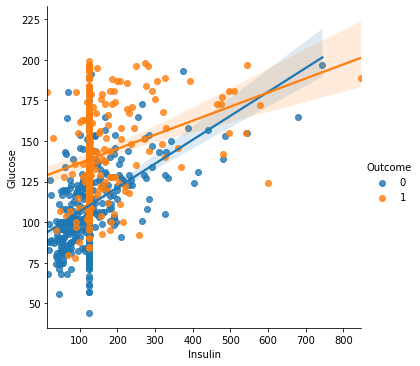

In [ ]:
sns.pointplot(data['Insulin'], data['Glucose'], hue=data['Outcome'])
sns.jointplot(data['Insulin'], data['Glucose'], kind='hex')
sns.lmplot(x='Insulin',y='Glucose',data=data,hue='Outcome')

In [ ]:
x=data.drop(['Outcome','AgeBins'],axis=1)
y=data.Outcome

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
models=[]
f1Scores=[]

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [ ]:
from sklearn.metrics import f1_score
print('F1Score of Logistic Regression: ', f1_score(y_test, y_pred, average="macro"))

F1Score of Logistic Regression:  0.7643893431812188


In [ ]:
models.append("Logistic Regression")
f1Scores.append(0.7643893431812188)

In [ ]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf')
classifier_rbf.fit(x_train, y_train)
y_pred = classifier_rbf.predict(x_test)
print('Accuracy of SVC (RBF) classifier on test set: {:.2f}'.format(classifier_rbf.score(x_test, y_test)))
print('F1Score of SVC (RBF) classifier ',f1_score(y_test, y_pred, average="macro"))

Accuracy of SVC (RBF) classifier on test set: 0.78
F1Score of SVC (RBF) classifier  0.7257490048187722


In [ ]:
models.append("SVM Classifier")
f1Scores.append(0.7257490048187722)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
randomForest.fit(x_train, y_train)
y_pred = randomForest.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(randomForest.score(x_test, y_test)))
print('F1Score of Random Forest classifier ',f1_score(y_test, y_pred, average="macro"))

Accuracy of Random Forest on test set: 0.82
F1Score of Random Forest classifier  0.7945144551519644


In [ ]:
models.append("Random Forest Classifier")
f1Scores.append(0.7945144551519644)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradBoost=GradientBoostingClassifier(loss="exponential",learning_rate=0.01, n_estimators=50, max_depth=10,random_state=42)
gradBoost.fit(x_train,y_train)
ypredGradBoost=gradBoost.predict(x_test)
print('Accuracy of Gradient Boosting Classifier on test set: {:.2f}'.format(gradBoost.score(x_test, y_test)))
print('F1Score of Gradient Boosting classifier ',f1_score(y_test, y_pred, average="macro"))

Accuracy of Gradient Boosting Classifier on test set: 0.77
F1Score of Gradient Boosting classifier  0.7945144551519644


In [ ]:
models.append("Gradient Boosting Classifier")
f1Scores.append(0.7945144551519644)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
xgBoost= XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
scores_xgBoost=cross_val_score(xgBoost,x_train,y_train,cv=10,scoring="f1_micro")
print(scores_xgBoost)
print(scores_xgBoost.mean())

[0.67741935 0.70967742 0.79032258 0.85483871 0.73770492 0.83606557
 0.75409836 0.63934426 0.73770492 0.75409836]
0.7491274457958751


In [ ]:
models.append("XGBoost Classifier")
f1Scores.append(0.7491274457958751)

In [ ]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(randomForest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
import pickle

In [ ]:
pickle.dump(randomForest,open('diabetes.pkl','wb'))

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
featureImportance=list(randomForest.feature_importances_)
allfeatures=data.drop('Outcome',axis=1)
features=list(allfeatures.columns)

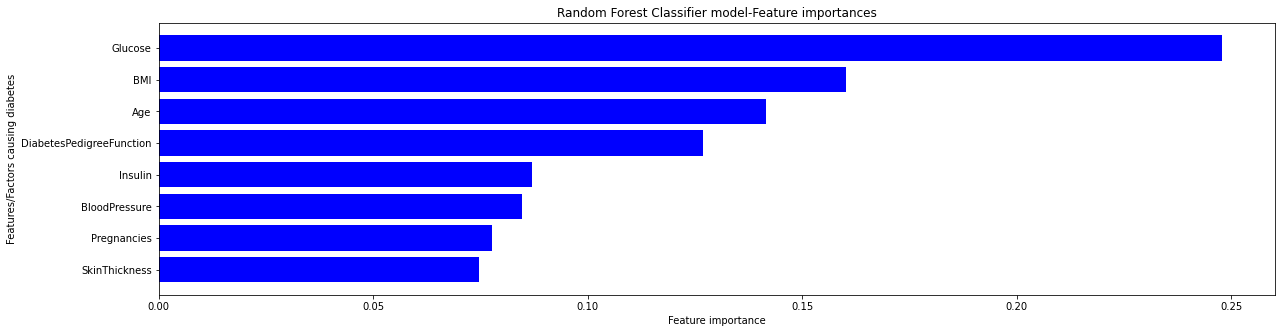

In [ ]:
import matplotlib.pyplot as plt
zipped_lists=zip(featureImportance,features)
zipped_lists=list(sorted(zipped_lists))
importanceSorted,featuresSorted = zip(*zipped_lists)
fig = plt.figure(figsize = (20, 5)) 
plt.barh(list(featuresSorted), list(importanceSorted), color ='blue') 
plt.title('Random Forest Classifier model-Feature importances')
plt.ylabel("Features/Factors causing diabetes") 
plt.xlabel("Feature importance") 
plt.show() 

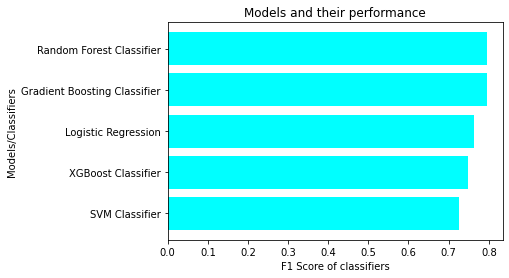

In [ ]:
zipped_lists=zip(f1Scores, models)
zipped_lists=list(sorted(zipped_lists))
f1ScoresSorted,modelsSorted = zip(*zipped_lists)
fig = plt.figure() 
plt.barh(list(modelsSorted), list(f1ScoresSorted), color ='cyan') 
plt.title('Models and their performance')
plt.xlabel("F1 Score of classifiers") 
plt.ylabel("Models/Classifiers") 
plt.show()